In [1]:
import csv
from lib2to3.pgen2 import driver
from re import template
from unittest import result
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

In [2]:
# getting ready, connect with webdriver 
s=Service('C:/Program Files/chromedriver_win32/chromedriver.exe')
browser = webdriver.Chrome(service=s)

## Generate url with search term (base function)

In [3]:
# get url
def get_url(search_term):
    """Generate a url from search term"""
    template = 'https://www.lazada.co.id/catalog/?q={}&_keyori=ss&from=input&spm=a2o4j.searchlist.search.go.6e9d3155pmM8Hx'
    search_term = search_term.replace(' ','+')
    return template.format(search_term)

In [4]:
# test the function, get_url 
url = get_url('laptop')
print(url)
browser.get(url)
soup = BeautifulSoup(browser.page_source, 'html.parser')
results = soup.find_all('div', {'class' : 'Bm3ON'})
print(len(results))

https://www.lazada.co.id/catalog/?q=laptop&_keyori=ss&from=input&spm=a2o4j.searchlist.search.go.6e9d3155pmM8Hx
40


Total items for page 1 are 40

In [5]:
# extract record 
def extract_record(item):
    """get all the record from url generated with get url function"""
    # title
    title = item.find('div', {'class' : 'RfADt'}).text
    # url 
    url = item.find('a', {'age' : '0'}).get('href').strip()
    # price 
    price = item.find('span', {'class' : 'ooOxS'}).text
    
    # review
    try:
        rev = item.find('span', {'class' : 'qzqFw'}).text
    except AttributeError: 
        rev = ''
    
    # city 
    city = item.find('span', {'class' : 'oa6ri'}).text
    
    result = (title, url, price, rev, city)
    return result

In [6]:
# test the extract_record function, get the information 
record = []
result = soup.find_all('div', {'class' : 'Bm3ON'})
for item in result:
    record.append(extract_record(item))

In [7]:
record[0]

('HP Laptop 14s-dq5000TU Natural silver Laptop Kosumer (66B31PA) /14""/Intel® Core™ i5-1240P/8 GB /Intel® Iris® Xᵉ Graphics/512 GB SSD/W11',
 '//www.lazada.co.id/products/hp-laptop-14s-dq5000tu-natural-silver-laptop-kosumer-66b31pa-14intel-core-i5-1240p8-gb-intel-iris-x-graphics512-gb-ssdw11-i6606874491.html',
 'Rp10.599.000',
 '',
 'Kota Jakarta Utara')

## Generate url for next, next, and next page 

In [8]:
# create the function to the next page
def get_url(search_term, page):
    """Generate a url from search term"""
    base_temp = 'https://www.lazada.co.id/catalog/?q={}&_keyori=ss&from=input&spm=a2o4j.searchlist.search.go.6e9d3155pmM8Hx'
    search_term = search_term.replace(' ','+')
    url = base_temp.format(search_term)
    
    next_page = url + '&page={}'
    if page == 1:
        return url
    else:
        url = next_page.format(page)
    
    return url

In [9]:
# test the new get_url function 
url_l = get_url('laptop', 3)
print(url_l)
browser.get(url_l)
soup = BeautifulSoup(browser.page_source, 'html.parser')
results = soup.find_all('div', {'class' : 'Bm3ON'})
print(len(results))

https://www.lazada.co.id/catalog/?q=laptop&_keyori=ss&from=input&spm=a2o4j.searchlist.search.go.6e9d3155pmM8Hx&page=3
40


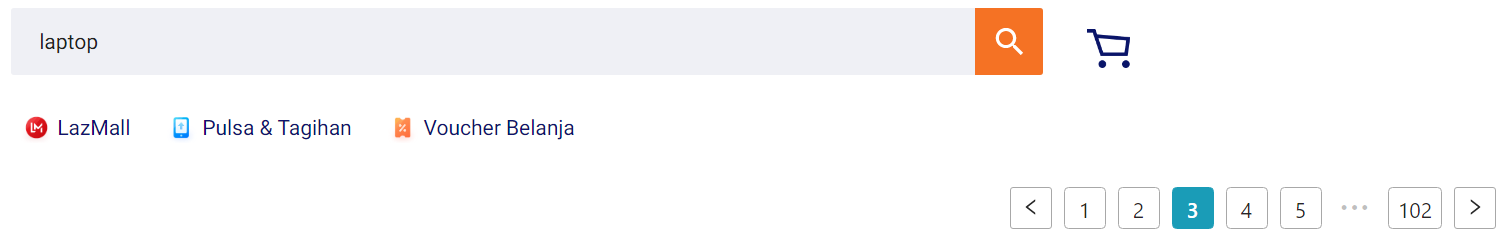

In [10]:
record_laptopu = []
result = soup.find_all('div', {'class' : 'Bm3ON'})
for item in result:
    record_laptopu.append(extract_record(item))

In [11]:
record_laptopu[0]

('HP 14s-fq1036AU & 14s-fq1037AU Silver&Gold Laptop Konsumer (463C7PA/463C8PA) / 14" FHD  / AMD Ryzen™ 7 5700U / 8GB / AMD Radeon™ Graphics / 512GBSSD / W10/ GRATIS UPGRADE W11',
 '//www.lazada.co.id/products/hp-14s-fq1036au-14s-fq1037au-silvergold-laptop-konsumer-463c7pa463c8pa-14-fhd-amd-ryzen-7-5700u-8gb-amd-radeon-graphics-512gbssd-w10-gratis-upgrade-w11-i5584622136.html',
 'Rp10.699.000',
 '(6)',
 'Kota Jakarta Utara')

## WRAP THESE FUNCTIONS LIKE A SANDWICH 🥪

In [34]:
import csv
from lib2to3.pgen2 import driver
from re import template
from unittest import result
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

def get_url(search_term, page):
    """Generate a url from search term"""
    base_temp = 'https://www.lazada.co.id/catalog/?q={}&_keyori=ss&from=input&spm=a2o4j.searchlist.search.go.6e9d3155pmM8Hx'
    search_term = search_term.replace(' ','+')
    url = base_temp.format(search_term)
    
    next_page = url + '&page={}'
    if page == 1:
        return url
    else:
        url = next_page.format(page)
    
    return url

def extract_record(item):
    """get all the record from url generated with get url function"""
    # title
    title = item.find('div', {'class' : 'RfADt'}).text
    # url 
    url = item.find('a', {'age' : '0'}).get('href').strip()
    # price 
    price = item.find('span', {'class' : 'ooOxS'}).text
    
    # review
    try:
        rev = item.find('span', {'class' : 'qzqFw'}).text
    except AttributeError: 
        rev = ''
    
    # city 
    city = item.find('span', {'class' : 'oa6ri'}).text
    
    result = (title, url, price, rev, city)
    return result


def main (search_term, page_i, page_f):
    
    """search term = item name, page_i = page initial, page_f = page final"""
    s = Service('C:/Program Files/chromedriver_win32/chromedriver.exe')
    browser = webdriver.Chrome(service=s)
    
    
    record = []
    
    for page in range(page_i, page_f):
        search_url = get_url(search_term, page)
        browser.get(search_url)
        bs = BeautifulSoup(browser.page_source, 'html.parser')
        result = bs.find_all('div', {'class' : 'Bm3ON'})
        
        """get the record"""
        for item in result:
            record.append(extract_record(item))
            
    # shut down and save the csv 
    
    with open('result/{}.csv'.format(search_term), 'w', newline='', encoding= 'utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['title', 'url', 'price', 'review', 'city'])
        writer.writerows(record)

In [35]:
main('laptop', 1, 2)